# Agenda
1. **Motivation** - Why do we want to evaluate our models?
2. **Evaluation Metrics** - What metrics should we choose for which problem?
3. **Summary**

# Motivation
**Our Goal** - Choose a model that will have **the best** results **on unseen data**.\
\
Now we have 2 problems to handle:
1. How do we generalize our predictions to unseen data?
2. How do we define what is best?

Model Evaluation aims to give answers to these problems.
1. Use a model **evaluation procedure** to estimate how well a model will generalize to out-of-sample data.
2. Choose model **evaluation metrics** to to quantify the model performance.



![title](Images/proccess2.png)

# Evaluation Metrics

Evaluation metrics are used to measure the quality of the statistical or machine learning model.\
\
Note:
- The metrics are guided by the **original objective** of the project.
    - predict house price.
- You can use multiple evaluation metrics to evaluate your model.

## Classification Metrics

##### Example - Diabetes prediction
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.\
Can be found here: https://www.kaggle.com/uciml/pima-indians-diabetes-database?select=diabetes.csv 

##### Objectives:  
    1. Classify at least 80% of sick people correctly.
    2. At least 40% of those classified as sick are actually sick.


In [77]:
import pandas as pd
import numpy as np
path = 'data/diabetes.csv'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(path, header=None, names=col_names).drop([0])
print(f'Data shape: {pima.shape}')
pima['label'].replace({"1": "sick", "0": "healthy"}, inplace=True)
pima.head()

Data shape: (768, 9)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,sick
2,1,85,66,29,0,26.6,0.351,31,healthy
3,8,183,64,0,0,23.3,0.672,32,sick
4,1,89,66,23,94,28.1,0.167,21,healthy
5,0,137,40,35,168,43.1,2.288,33,sick


In [78]:
# Get features and labels
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima['label']
#y.replace({"1": "0", "0": "1"}, inplace=True)

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [80]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

**Note:** At this stage we have a model that we want to evaluate.

In [142]:
y_pred_class = model.predict(X_test)

In [143]:
# calculate accuracy
from sklearn import metrics
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred_class)}')

Accuracy: 0.6770833333333334


In [144]:
y_test_numpy = np.where(y_test.to_numpy() == "1", 1, 0)

#### Confusion Matrix
The confusion matrix breaks down the classification results, showing a summary of the performance of the predictions against the actuals.
1. **Binary Case**:
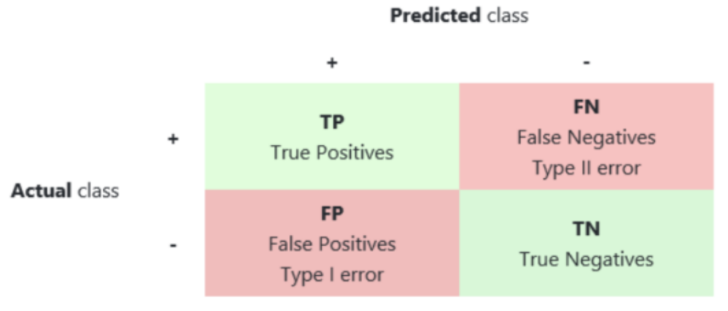
    - **True Positive (TP)**: The model *correctly* predicts (T) the Positive class (P).
    - **True Negative (TN)**: The model *correctly* predicts (T) the Negative class (N).
    - **False Positive (FP)**: The model *incorrectly* predicts (F) the Positive class (P). "Type I error"
    - **False Negative (FN)**: The model *incorrectly* predicts (F) the Negative class (N). "Type II error"


[[ 16  46]
 [ 16 114]]


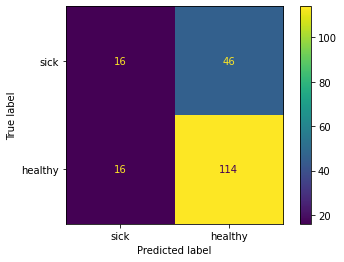

In [94]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test, labels=["sick", "healthy"])
print(metrics.confusion_matrix(y_test, y_pred_class, labels=["sick", "healthy"]))
plt.show()

In [99]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class, labels=["sick", "healthy"])
TP = confusion[0, 0]
TN = confusion[1, 1]
FP = confusion[1, 0]
FN = confusion[0, 1]

##### Performance Metrics from the confustion matrix
1. **Accuracy**: We can get the accuracy from the confusion matrix.
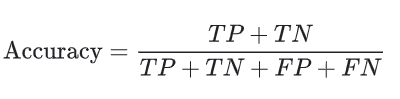

In [100]:
print(f'Accuarcy: {(TP+TN) / (TP+TN+FP+FN)}')

Accuarcy: 0.6770833333333334


2. **Precision**: The proportion of positive **identifications** that was actually correct. Penalizes models with false positives. You can think about it as the accuracy of the positive prediction.
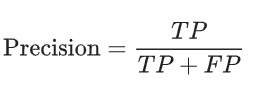



3. **Recall (Sensitivity)**: The proportion of **actual** positives that was identified correctly. Penalizes models with false negatives. It's the coverage of actual positive results.
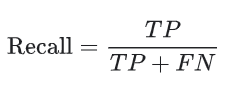

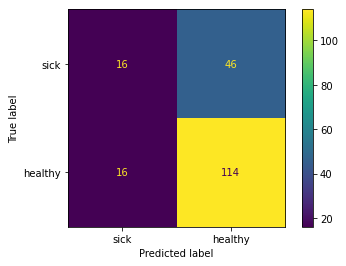

##### Objectives:  
  1. Classify at least 80% of sick people correctly. - **Recall**
  2. At least 40% of those classified as sick are actually sick. - **Precision**

In [101]:
precision = (TP) / (TP+FP)
print(f'Precision: {precision}')

Precision: 0.5


In [145]:
recall = (TP) / (TP+FN)
print(f'Recall: {recall}')

Recall: 0.25806451612903225


##### Precision-Recall curve
The precision-recall curve shows the tradeoff between precision and recall for different threshold. **A high area under the curve represents both high recall and high precision**, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

Logistic PR AUC: 0.524


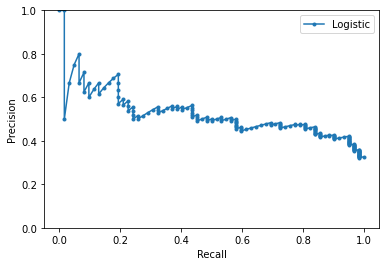

In [146]:
from sklearn.metrics import auc

y_test_numpy = np.where(y_test.to_numpy() == "sick", 1, 0) 

# plot no skill and model precision-recall curves
def plot_pr_curve(y_test, model_probs):
    
    # plot model precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, model_probs)
    plt.plot(recall, precision, marker='.', label='Logistic')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0,1])
    plt.legend()
    plt.show()


yhat = model.predict_proba(X_test)
model_probs = yhat[:, 1]
precision, recall, _ = precision_recall_curve(y_test_numpy, model_probs)
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)
plot_pr_curve(y_test_numpy, model_probs)

5. **F1-score**: The F1 score is the harmonic mean of the precision and recall. The more generic $F_{\beta }$ score applies additional weights, valuing one of precision or recall more than the other.
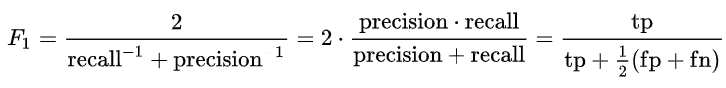

In [104]:
f_1 = 2 * (precision * recall) / (precision + recall)
print(f'F1 score: {f_1}')

F1 score: 0.3404255319148936


In [105]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_class)
print(report)

              precision    recall  f1-score   support

     healthy       0.71      0.88      0.79       130
        sick       0.50      0.26      0.34        62

    accuracy                           0.68       192
   macro avg       0.61      0.57      0.56       192
weighted avg       0.64      0.68      0.64       192



# Summary

1. There are different metrics for evaluation.
2. Sometimes Accuracy is not the right metric.
3. Metrics must be guided by the project objective.
4. The metrics can give us extra information for further data exploration.

# Links


**Classification Metrics**:
- https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/#:~:text=The%20Precision%2DRecall%20AUC%20is,a%20model%20with%20perfect%20skill.

- https://www.youtube.com/watch?v=3FtBY22hmrg

- https://acutecaretesting.org/en/articles/precision-recall-curves-what-are-they-and-how-are-they-used#:~:text=Now%20the%20curve%20is%20constructed,pairs%20for%20precision%20and%20recall.&text=Precision%2Drecall%20curves%20are%20often,make%20comparisons%20between%20curves%20challenging.

- https://scikit-learn.org/stable/model_selection.html

- https://www.analyticsvidhya.com/blog/2020/10/quick-guide-to-evaluation-metrics-for-supervised-and-unsupervised-machine-learning/


**Regression Metrics**:
- https://towardsdatascience.com/regression-an-explanation-of-regression-metrics-and-what-can-go-wrong-a39a9793d914#:~:text=Regression%20task%20is%20the%20prediction,of%20other%20correlated%20independent%20variables.&text=The%20various%20metrics%20used%20to,Squared%2DError(RMSE).

- https://medium.com/usf-msds/choosing-the-right-metric-for-machine-learning-models-part-1-a99d7d7414e4
